<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 11 グラフを描く
# Section 11-2 棒グラフ／散布図などいろいろなグラフ

## 参考サイト
### [【Python早見表】Matplotlib: グラフの描画](https://chokkan.github.io/python/18plot.html)
### [【Python入門】Matplotlibライブラリ](https://utokyo-ipp.github.io/appendix/5-matplotlib.html)

### 定数の定義、ドライブのマウント、カレントディレクトリの移動

In [1]:
# データファイルパス定義
TEST_PATH = "./data/test{:02}.csv" # とある課題（3〜8）の点数結果。0埋めのformat用書式
GDP_DATA_PATH = "./data/{}_{}.csv" # GDPオープンデータ
INDUSTRY_NORMAL_PATH = "./data/industry_nominal.csv" # オープンデータ 産業別名目GDP(https://www.soumu.go.jp/johotsusintokei/whitepaper/ja/r03/html/nd241110.html)
INDUSTRY_REAL_PATH = "./data/industry_real.csv" # オープンデータ 産業別実質GDP
GDP_INFO_NORMAL_PATH = "./data/GDP_info_nominal.csv" # オープンデータ 情報通信産業の国内生産額 名目
GDP_INFO_REAL_PATH = "./data/GDP_info_real.csv" # オープンデータ  情報通信産業の国内生産額 実質
IRIS_PATH = "./data/iris.csv" # Pythonで有名なあやめのデータ(https://www.kaggle.com/datasets/saurabh00007/iriscsv)

In [1]:
# matplotlib日本語対応ライブラリのインストール
!pip install japanize_matplotlib

In [2]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

## サンプルプログラム2　棒グラフ
- 課題結果データで棒グラフを描画します。

#### 課題結果を可視化するクラスを作成する
- 個々のデータを格納するTestDataクラスと、全てのデータを管理するTestDataManagerクラスを作成する
- コンストラクタ（初期化関数）で課題の番号を指定するとファイル読み込みを行う
- ファイル読み込みはTestDataManager.readFile()関数で行う
- 可視化はTestDataManager.plot()関数で行う

In [4]:
# 課題結果データクラスの定義
class TestData:
    # 初期化メソッド
    def __init__(self, kubun, count):
        self.kubun = kubun # 
        self.count = count

# 課題結果データManagerクラスの定義
class TestDataManager:
    # 初期化メソッド
    def __init__(self, number):
        self.number = number
        self.records = self.readFile(number)
    
    # ファイル読み込み
    def readFile(self, number):
        records = []
        with open(TEST_PATH.format(number), mode="r", encoding="utf_8") as f:
            all_lines = f.readlines()
            records = []
            for line1 in all_lines:
                record1 = line1.rstrip().split(',')
                records.append(TestData(record1[0],int(record1[1]))) # カンマ区切りで区分と人数が格納されているので、インスタンス化して取得
        return records

    # 全体の合計人数を取得
    def getTotalCount(self):
        return self.records[-2].count + self.records[-3].count
    
    # 可視化
    def plot(self):
        kubun = [record1.kubun for record1 in self.records]
        count = [record1.count for record1 in self.records]
        total_count = self.getTotalCount()
        fig, ax = plt.subplots(figsize=(15,8))# サイズを指定
        bar1 = ax.bar(kubun, count, label="test{:02}".format(self.number)) # X軸、Y軸両方、凡例を指定。
        ax.bar_label(bar1, label_type='edge', padding=0, color='blue') # 棒グラフにラベルを設定
        ax.set_xticks(range(len(kubun))) # tick location を指定。0〜表示ラベル数分のindexをtick locationとします。
        ax.set_xticklabels(kubun) # 表示ラベルを変更
        ax.xaxis.set_tick_params(rotation=0) # X軸の表示を90度回転させる。
        ax.yaxis.set_major_formatter('{x:.0f}人') # Y軸に単位をつける
        ax.legend(loc="upper left") # 凡例を有効にする
        ax.grid(axis='y') # グリッドを有効にする
        ax.set_title("とある課題{:02}の結果(提出数:{})".format(self.number, total_count)) # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。

#### 実際に棒グラフを描画してみる
- 課題の読み込みはTestDataManagerクラスを初期化するだけ
- 可視化はTestDataManager.plot()関数を呼び出すだけ

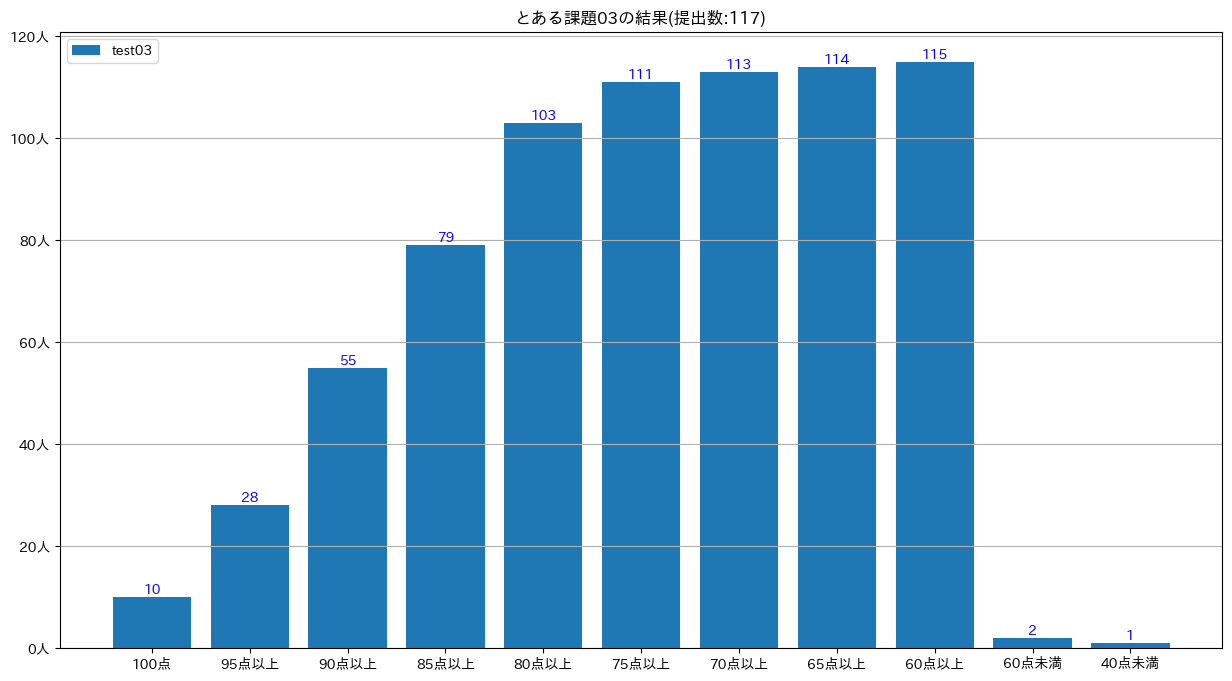

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlibで日本語表示できない時にpipでライブラリをインストールして、有効にしてみてください

test_data_manager = TestDataManager(3)
test_data_manager.plot()
plt.show()

### 考察
- 100点の人が10人居る
  - 比較的簡単だった？
- 80点以上の人が103人居る
  - 8割以上の人が高得点と取得しており、全体的に成績が良かったことが伺える
- 60点未満の人が2人居る
  - 課題点で60点未満が続くようだと単位取得が困難なため、その旨FBする

## 練習プログラム2　棒グラフ (2.5点)
- 表示する課題は、サンプルプログラムや授業とは違うデータにしましょう。
- 課題データ管理クラス TestDataManager() は継承して使用してOKです。
- 可視化して得られた考察をNotebookに記載してみましょう。考察は多ければ多いほどよいですが、少なくとも３つは記載してみましょう。

---
---
---
---
---

## サンプルプログラム3　散布図
- Pythonで有名なあやめのデータで散布図を描画します。
<img src="./image/petal_sepal_label.png">

#### あやめのデータを可視化するクラスの作成
- 個々のデータを格納するIrisDataクラスと、全てのデータを管理する IrisDataManager クラスを作成する
- コンストラクタ（初期化関数）で読み込むデータを指定するとファイル読み込みを行う
- 可視化は IrisDataManager.plot() 関数で行う

In [12]:
# あやめデータクラスの定義
class IrisData:
    # 初期化メソッド
    def __init__(self, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species):
        self.SepalLengthCm = float(SepalLengthCm)
        self.SepalWidthCm = float(SepalWidthCm)
        self.PetalLengthCm = float(PetalLengthCm)
        self.PetalWidthCm = float(PetalWidthCm)
        self.Species = Species

# あやめデータManagerクラスの定義
class IrisDataManager:
    # 初期化メソッド
    def __init__(self):
        self.readFile()

    # 各あやめのデータのパース
    def __parseData(self, all_lines):
        records = []
        for index in range(1,len(all_lines)):
            rows = [value.strip('"') for value in all_lines[index].rstrip().split(',')]
            data = IrisData(rows[1], rows[2], rows[3], rows[4], rows[5])
            records.append(data)
        self.records = records

    # 種ごとの各あやめのデータの作成
    def __parseSpecies(self):
        self.species = list(set([record.Species for record in self.records])) # 種の種類をsetで取得→listで取得
        self.species_dict = dict()
        for species1 in self.species:
            self.species_dict[species1] = list(filter(lambda x: x.Species == species1, self.records))
        
    # ファイル読み込み
    def readFile(self):
        all_lines = []
        with open(IRIS_PATH, mode="r", encoding="utf-8") as f:
            all_lines = f.readlines()
        self.__parseData(all_lines)
        self.__parseSpecies()

    # 可視化
    def plot(self, x_label, y_label):
        fig, ax = plt.subplots(figsize=(15,8))# サイズを指定
        scatters = []
        for species1 in self.species:
            x_values = [getattr(record, x_label) for record in self.species_dict[species1]]
            y_values = [getattr(record, y_label) for record in self.species_dict[species1]]
            scatters.append(ax.scatter(x_values, y_values, label=species1))    # グラフを描く

        ax.legend(scatters, self.species, loc = "upper left")    # 凡例を作る
        ax.xaxis.set_major_formatter('{x:.1f} cm') # X軸に単位をつける
        ax.yaxis.set_major_formatter('{x:.1f} cm') # Y軸に単位をつける
        ax.grid() # グリッドを有効にする
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title("あやめのデータ({}/{})".format(x_label, y_label)) # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。            

#### 実際にあやめの散布図を描画してみる
- GDPデータの読み込みは IrisDataManager クラス を初期化するだけ
- 可視化は IrisDataManager.plot() 関数を呼び出すだけ

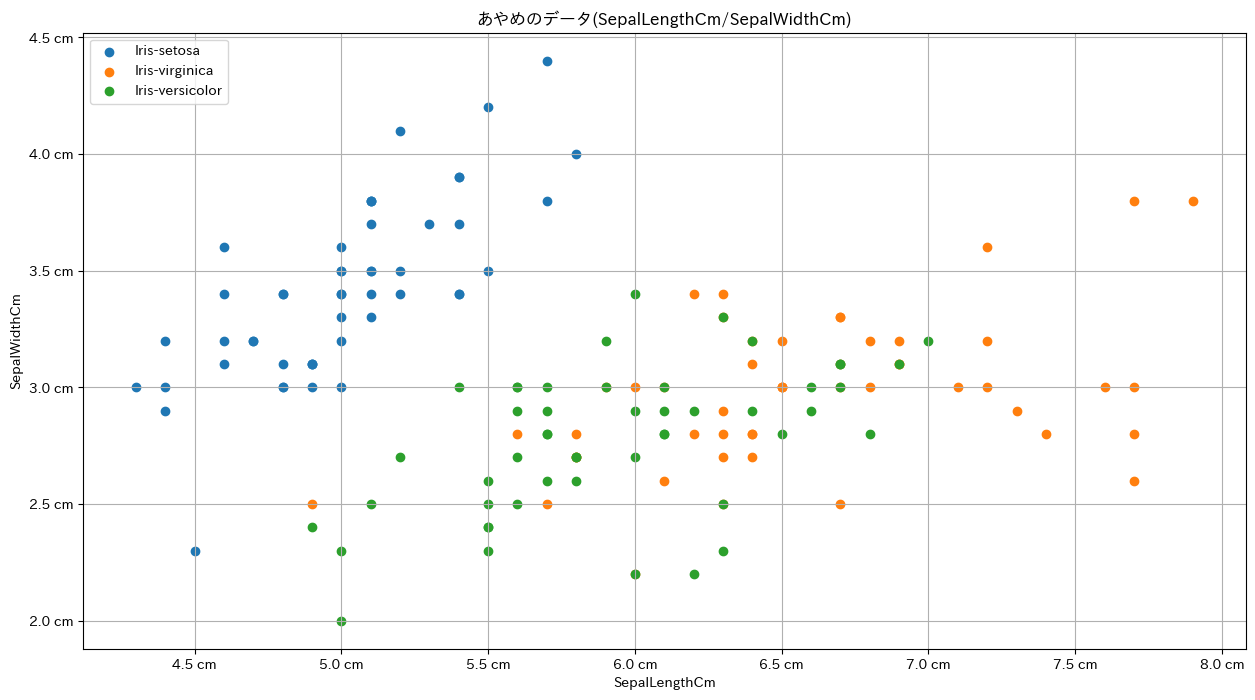

In [13]:
iris_manager = IrisDataManager()
iris_manager.plot("SepalLengthCm", "SepalWidthCm")

## 練習プログラム3　散布図 (2.5点)
- 表示するデータは、サンプルプログラムや授業とは違うデータにしましょう。
- データ管理クラス IrisDataManager() は継承して使用してOKです。
- 可視化して得られた考察をNotebookに記載してみましょう。考察は多ければ多いほどよいですが、少なくとも３つは記載してみましょう。

---
---
---
---
---

## サンプルプログラム4　複数のグラフを並べる
- 課題結果データを複数のサブプロット(subplot)に描画します。

#### 課題結果をsubplotに可視化するクラスを作成する
- 課題データ管理クラス TestDataManager() を継承して作成します

In [18]:
# 課題結果データManagerクラスの定義
class TestDataManagerSubplot(TestDataManager):
    # 可視化
    def subplot(self, ax, x_label_rotation=0):
        kubun = [record1.kubun for record1 in self.records]
        count = [record1.count for record1 in self.records]
        total_count = self.getTotalCount()
        bar1 = ax.bar(kubun, count, label="test{:02}".format(self.number)) # X軸、Y軸両方、凡例を指定。
        ax.bar_label(bar1, label_type='edge', padding=0, color='blue') # 棒グラフにラベルを設定
        ax.set_xticks(range(len(kubun))) # tick location を指定。0〜表示ラベル数分のindexをtick locationとします。
        ax.set_xticklabels(kubun) # 表示ラベルを変更
        ax.xaxis.set_tick_params(rotation=x_label_rotation) # X軸の表示を90度回転させる。
        ax.yaxis.set_major_formatter('{x:.0f}人') # Y軸に単位をつける
        ax.legend(loc="upper left") # 凡例を有効にする
        ax.grid(axis='y') # グリッドを有効にする
        ax.set_title("とある課題{:02}の結果(提出数:{})".format(self.number, total_count)) # タイトルを表示。日本語が文字化けしてしまう場合はjapanize_matplotlibを使用してください。

#### 課題結果を実際にsubplotに可視化する
- 課題データ管理クラス TestDataManager() を継承して作成します

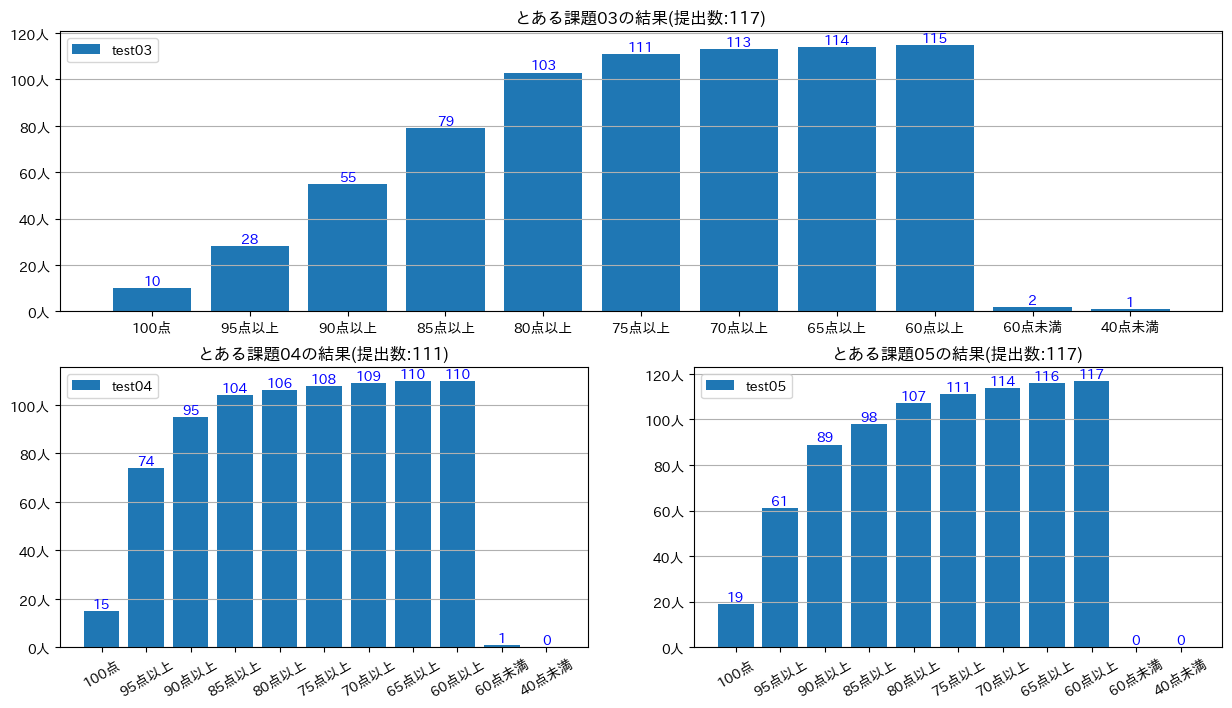

In [19]:
fig = plt.figure(figsize=(15,8))# サイズを指定
TestDataManagerSubplot(3).subplot(fig.add_subplot(2, 1, 1))
TestDataManagerSubplot(4).subplot(fig.add_subplot(2, 2, 3), 30)
TestDataManagerSubplot(5).subplot(fig.add_subplot(2, 2, 4), 30)

## 練習プログラム4　複数のグラフを並べる (2.5点)
- 表示するデータは、サンプルプログラムや授業とは違うデータにしましょう。
- 可視化して得られた考察をNotebookに記載してみましょう。考察は多ければ多いほどよいですが、少なくとも３つは記載してみましょう。

---
---
---
---
---